#### AFML - GUDHI TDA library test

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import gudhi as gd
%matplotlib inline

import ripser
from persim import plot_diagrams

from AFML_functions import read_AFM_XYZ, mean_shift, down_shift, plot_CG_2d, plot_CG_3d, unique_z, interpolate_downsample, smooth_terraces, read_XYZ, cut_out, plot_PC_2d, plot_PC_3d, extract_dimensions

In [2]:
afm = read_AFM_XYZ('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/terrace_sample/save-2011.11.30-14.25.48_terrace_200.xyz')
#afm = read_AFM_XYZ('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/terrace_sample/save-2011.11.30-14.25.48_terrace_IDEAL.xyz')
rounded_afm = mean_shift(afm, bandwidth=0.00000475)
smooth_afm = smooth_terraces(rounded_afm, 0.1)
nearest_36 = interpolate_downsample(smooth_afm, 36, 'nearest')

plot_PC_2d(nearest_36)
plot_PC_3d(nearest_36)

NameError: name 'plot_afm_2d' is not defined

In [ ]:
extract_dimensions(nearest_36)

Max X: 0.0012148134012777952
Min X: 3.109590900375666e-06
Max Y: 0.007474054010521392
Min Y: 0.005413117379197596
Max Z: 3.703497693922487e-05
Min Z: 9.290414944757932e-06


**Quick TDA calculaton with Ripser**

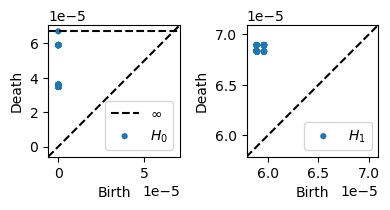

In [ ]:
dgms = ripser.ripser(nearest_36)['dgms']

plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))

#### TDA test with Gudhi - VR and alpha complexes, persistence diagrams

Testing multiple max_edge_length values in relation to simplex tree computation

In [ ]:
skeleton0001 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.0001)
skeleton001 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.001)
skeleton01 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.01)
skeleton1 = gd.RipsComplex(points = nearest_36, max_edge_length = 0.1)

**1D w/ max_edge_length = 0.0001**

In [ ]:
Rips_simplex_tree_0001_1d = skeleton0001.create_simplex_tree(max_dimension=1)

In [ ]:
st_0001_1d_dim = Rips_simplex_tree_0001_1d.dimension()
st_0001_1d_vert = Rips_simplex_tree_0001_1d.num_vertices()
st_0001_1d_simp = Rips_simplex_tree_0001_1d.num_simplices()

print("dim: " + str(st_0001_1d_dim) + "\nvert: " + str(st_0001_1d_vert) + "\nsimp: " + str(st_0001_1d_simp))

dim: 1
vert: 1296
simp: 9870


In [ ]:
barcode_0001_1d = Rips_simplex_tree_0001_1d.persistence()

for i in range(5):
    print(barcode_0001_1d[i])

#gd.plot_persistence_diagram(barcode_0001_1d)

(0, (0.0, inf))
(0, (0.0, 5.8883903752108765e-05))
(0, (0.0, 5.8883903752108765e-05))
(0, (0.0, 5.8883903752108765e-05))
(0, (0.0, 5.8883903752108765e-05))


**2D w/ max_edge_length = 0.0001**

In [ ]:
Rips_simplex_tree_0001_2d = skeleton0001.create_simplex_tree(max_dimension=2)

In [ ]:
st_0001_2d_dim = Rips_simplex_tree_0001_2d.dimension()
st_0001_2d_vert = Rips_simplex_tree_0001_2d.num_vertices()
st_0001_2d_simp = Rips_simplex_tree_0001_2d.num_simplices()

print("dim: " + str(st_0001_2d_dim) + "\nvert: " + str(st_0001_2d_vert) + "\nsimp: " + str(st_0001_2d_simp))

dim: 2
vert: 1296
simp: 27894


**1D w/ max_edge_length = 0.001**

In [ ]:
Rips_simplex_tree_001_1d = skeleton001.create_simplex_tree(max_dimension=1)

In [ ]:
st_001_1d_dim = Rips_simplex_tree_001_1d.dimension()
st_001_1d_vert = Rips_simplex_tree_001_1d.num_vertices()
st_001_1d_simp = Rips_simplex_tree_001_1d.num_simplices()

print("dim: " + str(st_001_1d_dim) + "\nvert: " + str(st_001_1d_vert) + "\nsimp: " + str(st_001_1d_simp))

dim: 1
vert: 1296
simp: 517619


**2D w/ max_edge_length = 0.001**

In [ ]:
Rips_simplex_tree_001_2d = skeleton001.create_simplex_tree(max_dimension=2)

In [ ]:
st_001_2d_dim = Rips_simplex_tree_001_2d.dimension()
st_001_2d_vert = Rips_simplex_tree_001_2d.num_vertices()
st_001_2d_simp = Rips_simplex_tree_001_2d.num_simplices()

print("dim: " + str(st_001_2d_dim) + "\nvert: " + str(st_001_2d_vert) + "\nsimp: " + str(st_001_2d_simp))

dim: 2
vert: 1296
simp: 114022159


**1D w/ max_edge_length = 0.01**

In [ ]:
Rips_simplex_tree_01_1d = skeleton01.create_simplex_tree(max_dimension=1)

In [ ]:
st_01_1d_dim = Rips_simplex_tree_01_1d.dimension()
st_01_1d_vert = Rips_simplex_tree_01_1d.num_vertices()
st_01_1d_simp = Rips_simplex_tree_01_1d.num_simplices()

print("dim: " + str(st_01_1d_dim) + "\nvert: " + str(st_01_1d_vert) + "\nsimp: " + str(st_01_1d_simp))

dim: 1
vert: 1296
simp: 840456


**2D w/ max_edge_length = 0.01**

In [ ]:
Rips_simplex_tree_01_2d = skeleton01.create_simplex_tree(max_dimension=2)

In [ ]:
st_01_2d_dim = Rips_simplex_tree_01_2d.dimension()
st_01_2d_vert = Rips_simplex_tree_01_2d.num_vertices()
st_01_2d_simp = Rips_simplex_tree_01_2d.num_simplices()

print("dim: " + str(st_01_2d_dim) + "\nvert: " + str(st_01_2d_vert) + "\nsimp: " + str(st_01_2d_simp))

dim: 2
vert: 1296
simp: 362798136


**1D w/ max_edge_length = 0.1**

In [ ]:
Rips_simplex_tree_1_1d = skeleton1.create_simplex_tree(max_dimension=1)

In [ ]:
st_1_1d_dim = Rips_simplex_tree_1_1d.dimension()
st_1_1d_vert = Rips_simplex_tree_1_1d.num_vertices()
st_1_1d_simp = Rips_simplex_tree_1_1d.num_simplices()

print("dim: " + str(st_1_1d_dim) + "\nvert: " + str(st_1_1d_vert) + "\nsimp: " + str(st_1_1d_simp))

dim: 1
vert: 1296
simp: 840456


**2D w/ max_edge_length = 0.1**

In [ ]:
Rips_simplex_tree_1_2d = skeleton1.create_simplex_tree(max_dimension=2)

In [ ]:
st_1_2d_dim = Rips_simplex_tree_1_2d.dimension()
st_1_2d_vert = Rips_simplex_tree_1_2d.num_vertices()
st_1_2d_simp = Rips_simplex_tree_1_2d.num_simplices()

print("dim: " + str(st_1_2d_dim) + "\nvert: " + str(st_1_2d_vert) + "\nsimp: " + str(st_1_2d_simp))

dim: 2
vert: 1296
simp: 362798136
